In [3]:
# import zipfile as zf
# files = zf.ZipFile("SNAP.zip", 'r')
# files.extractall('C:\\Users\\angel\\Documents\\NCNW Census 2018\\TrendAnalysis\\SNAP')
# files.close()


gname='B22005'

path=%pwd

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_files = os.listdir(path)


In [5]:
#set up labels for race/ethnicity, and years

ethnicityLabels={'White alone':'A', "Black or African-American alone":'B', "American Indian or Alaska Native alone":'C', 
           "Asian alone":'D', 'Native Hawaiian and other Pacific Islander alone':'E', 'Some other race': 'F', 'Two or more races': 'G', 'White alone, not Hispanic or Latino':'H', 'Hispanic or Latino':'I' }
ShortenedLabels={'White alone':'White', "Black or African-American alone":'Black', "American Indian or Alaska Native alone":'Native American', 
           "Asian alone":'Asian', 'Native Hawaiian and other Pacific Islander alone':'Pacific Islander', 'Some other race': 'Other', 'Two or more races': 'Two ore more races','White alone, not Hispanic or Latino':'White, not Hispanic or Latino', 'Hispanic or Latino':'Hispanic or Latino' }
years=[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


#read data files; each race/ethnicity as one key in the dictionary

#extract file names
data_files_DATA_byrace=dict()
data_files_LEGEND_byrace=dict()

ethnicityLabels.keys()
for label in ethnicityLabels:
    labelLong=gname+ethnicityLabels[label]+'_'
    forLabel_DATA=[f for f in os.listdir('C:\\Users\\angel\\Documents\\NCNW Census 2018\\TrendAnalysis\\SNAP') if labelLong in f and 'DATA' in f]
    forLabel_LEGEND=[f for f in os.listdir('C:\\Users\\angel\\Documents\\NCNW Census 2018\\TrendAnalysis\\SNAP') if labelLong in f and 'LEGEND' in f and 'csv' in f]
    data_files_DATA_byrace[label]=forLabel_DATA
    data_files_LEGEND_byrace[label]=forLabel_LEGEND

    
#actual dataframes
    
data_byrace=dict()
legend_byrace=dict()
for label in ethnicityLabels:
    data_byrace[label]=[pd.read_csv(file) for file in  data_files_DATA_byrace[label]]
    legend_byrace[label]=[pd.read_csv(file) for file in data_files_LEGEND_byrace[label]]

    

In [6]:
data_files_DATA_byrace['Black or African-American alone']

['acs-acs1-2005-GROUP_B22005B_DATA.csv',
 'acs-acs1-2006-GROUP_B22005B_DATA.csv',
 'acs-acs1-2007-GROUP_B22005B_DATA.csv',
 'acs-acs1-2008-GROUP_B22005B_DATA.csv',
 'acs-acs1-2009-GROUP_B22005B_DATA.csv',
 'acs-acs1-2010-GROUP_B22005B_DATA.csv',
 'acs-acs1-2011-GROUP_B22005B_DATA.csv',
 'acs-acs1-2012-GROUP_B22005B_DATA.csv',
 'acs-acs1-2013-GROUP_B22005B_DATA.csv',
 'acs-acs1-2014-GROUP_B22005B_DATA.csv',
 'acs-acs1-2015-GROUP_B22005B_DATA.csv',
 'acs-acs1-2016-GROUP_B22005B_DATA.csv',
 'acs-acs1-2017-GROUP_B22005B_DATA.csv',
 'acs-acs1-2018-GROUP_B22005B_DATA.csv']

In [7]:
legend_byrace['Black or African-American alone'][0]

,VARIABLE,TYPE,LABEL,GROUP
0,B22005B_001E,int,Estimate!!Total,B22005B
1,B22005B_002E,int,Estimate!!Total!!Household received Food Stamp...,B22005B
2,B22005B_003E,int,Estimate!!Total!!Household did not receive Foo...,B22005B
3,B22005B_001M,int,Margin of Error!!Total,B22005B
4,B22005B_002M,int,Margin of Error!!Total!!Household received Foo...,B22005B
5,B22005B_003M,int,Margin of Error!!Total!!Household did not rece...,B22005B
6,B22005B_001EA,string,Annotation of Estimate!!Total,B22005B
7,B22005B_001MA,string,Annotation of Margin of Error!!Total,B22005B
8,B22005B_002EA,string,Annotation of Estimate!!Total!!Household recei...,B22005B
9,B22005B_002MA,string,Annotation of Margin of Error!!Total!!Househol...,B22005B


In [8]:
data_byrace['Black or African-American alone'][0].head()


,GEO_ID,B22005B_001E,B22005B_001M,B22005B_002E,B22005B_002M,B22005B_003E,B22005B_003M,NAME,B22005B_001EA,B22005B_001MA,B22005B_002EA,B22005B_002MA,B22005B_003EA,B22005B_003MA,us
0,0100000US,13141111,31109,2617091,26243,10524020,37329,United States,NaN,NaN,NaN,NaN,NaN,NaN,1


In [9]:
#now we put the years together


for label in data_byrace:
    for n in range(len(years)):
        data_byrace[label][n].rename(index={0: years[n]}, inplace=True)            #rename index values to years

for label in data_byrace:
    dataFrames=data_byrace[label].copy()
    dataFrame=dataFrames[0].T.copy()
    for n in range(1, len(years)):
        dataFrame=dataFrame.join(dataFrames[n].T)     #join; transpose to join by variables
    data_byrace[label]=dataFrame.T    
   #to see what each frame looks like, uncomment next line
#data_byrace['Black or African-American alone']



In [10]:
#now dealing with variables


variables=['001E', '002E', '003E']

                  
                  
file=legend_byrace['Black or African-American alone'][0].copy()
file.set_index('VARIABLE', inplace=True)
file=file.T
cols=list(file.columns)
longNamesVariables=dict()
for suffix in variables:
    for variableName in cols:
        if variableName[-4:]==suffix:
            longName=variableName
    #longLabel=file[longName]['LABEL'][17:].replace('!!', ': ')
    #longNamesVariables[suffix]=longLabel
    #if len(longLabel)==0:
    #    longNamesVariables[suffix]='Total'
    longNamesVariables[suffix]=file[longName]['LABEL']


#set up short names to variables, for plotting
shortNamesVariables=dict()
for suffix in variables:
    for variableName in cols:
        if variableName[-4:]==suffix:
            longName=variableName
    shortLabel=file[longName]['LABEL'][17:].replace('!!', ': ')
    shortNamesVariables[longNamesVariables[suffix]]=shortLabel
    if len(shortLabel)==0:
        shortNamesVariables[longNamesVariables[suffix]]='All households'


#to see the labels, uncomment the next 2 lines
print(longNamesVariables)
print(shortNamesVariables)


#now setting up variables for each ethnicity/race
#probably overkill, but should let us know if an variables are missing

ethnicityVars=dict()
for label in ethnicityLabels:
    ethnicityVars[label]=[]
    file=legend_byrace[label][0].copy()
    file.set_index('VARIABLE', inplace=True)
    file=file.T
    cols=list(file.columns)
    for suffix in variables:
        for variableName in cols:
            if variableName[-4:]==suffix:
                name=variableName
        ethnicityVars[label].append(name)

#print(ethnicityVars)        
    
for label in ethnicityLabels:
    dataFrame=data_byrace[label].copy()
    dataFrame=dataFrame[ethnicityVars[label]]
    data_byrace[label]=dataFrame


{'001E': 'Estimate!!Total', '002E': 'Estimate!!Total!!Household received Food Stamps in the past 12 months', '003E': 'Estimate!!Total!!Household did not receive Food Stamps in the past 12 months'}
{'Estimate!!Total': 'All households', 'Estimate!!Total!!Household received Food Stamps in the past 12 months': 'Household received Food Stamps in the past 12 months', 'Estimate!!Total!!Household did not receive Food Stamps in the past 12 months': 'Household did not receive Food Stamps in the past 12 months'}


In [11]:
data_byrace['Black or African-American alone']

,B22005B_001E,B22005B_002E,B22005B_003E
2005,13141111,2617091,10524020
2006,13073988,2589300,10484688
2007,13247930,2480701,10767229
2008,13368019,2716772,10651247
2009,13521438,3201616,10319822
2010,13738492,3587600,10150892
2011,13879391,3900716,9978675
2012,14051208,4123474,9927734
2013,14119977,4089722,10030255
2014,14334528,4052272,10282256


In [12]:
for label in ethnicityLabels:
    cols=list(data_byrace[label].columns)
    for col in cols:
        data_byrace[label].rename(columns={col: shortNamesVariables[longNamesVariables[col[-4:]]]}, inplace=True)
       

In [13]:
data_byrace['Black or African-American alone']

,All households,Household received Food Stamps in the past 12 months,Household did not receive Food Stamps in the past 12 months
2005,13141111,2617091,10524020
2006,13073988,2589300,10484688
2007,13247930,2480701,10767229
2008,13368019,2716772,10651247
2009,13521438,3201616,10319822
2010,13738492,3587600,10150892
2011,13879391,3900716,9978675
2012,14051208,4123474,9927734
2013,14119977,4089722,10030255
2014,14334528,4052272,10282256


In [14]:
#Add 'Not Black or African-American'

ethnicityLabels['Not Black or African-American']=''

data_byrace['Not Black or African-American']= data_byrace['White alone']+data_byrace["American Indian or Alaska Native alone"]+data_byrace['Asian alone']+data_byrace['Native Hawaiian and other Pacific Islander alone']+data_byrace['Some other race']+data_byrace['Two or more races']
data_byrace['Not Black or African-American']

,All households,Household received Food Stamps in the past 12 months,Household did not receive Food Stamps in the past 12 months
2005,97949506,6301378,91648128
2006,98543414,6430577,92112837
2007,99130047,6195533,92934514
2008,99733310,7052340,92680970
2009,100094791,8505903,91588888
2010,100828927,10020577,90808350
2011,101112334,11043926,90068408
2012,101918332,11691025,90227307
2013,102171056,11594393,90576663
2014,102924899,11444069,91480830


In [16]:
#Test
data_byrace['Black or African-American alone']['All households']-data_byrace['Black or African-American alone']['Household received Food Stamps in the past 12 months']-data_byrace['Black or African-American alone']['Household did not receive Food Stamps in the past 12 months']

2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: object

In [17]:

for label in ethnicityLabels:
    data_byrace[label]['Received SNAP fraction']=data_byrace[label].iloc[:, 1]/data_byrace[label].iloc[:, 0]
    

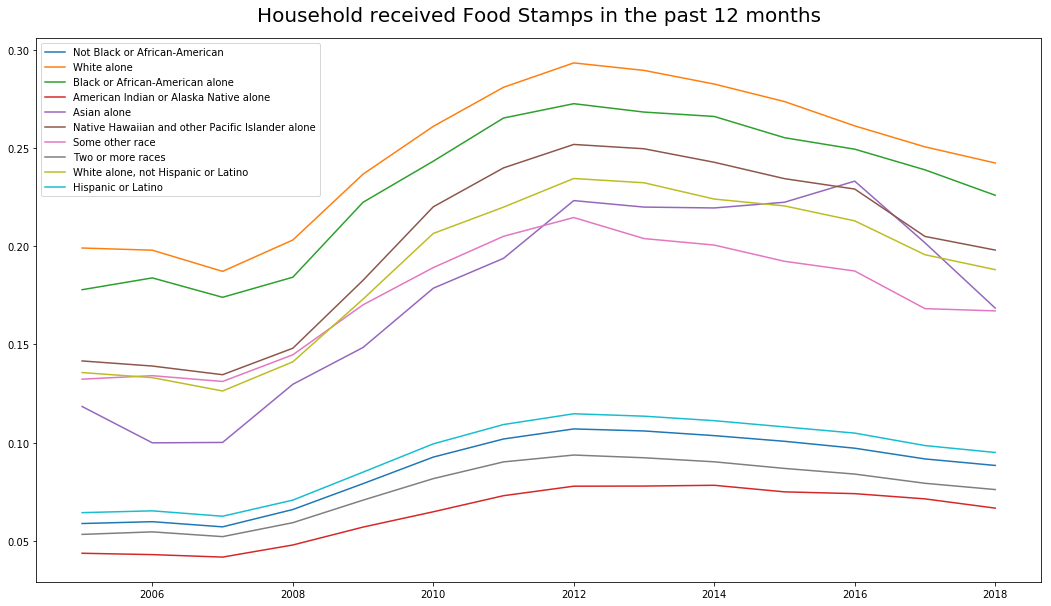

In [18]:
from numpy import *
import math
import matplotlib.pyplot as plt

import pandas as pd
from matplotlib.pyplot import *



dataFrameByAge=dict()



fig, ax = subplots()
for label in ethnicityLabels:
    frame=data_byrace[label]
    f1 = plt.figure(1)
    frame['Received SNAP fraction'].plot(figsize=(18,10), ax=ax)
    
ax.legend(['Not Black or African-American', "White alone", "Black or African-American alone", "American Indian or Alaska Native alone", 
               "Asian alone", 'Native Hawaiian and other Pacific Islander alone','Some other race','Two or more races','White alone, not Hispanic or Latino', 'Hispanic or Latino']);
ax.set_title('Household received Food Stamps in the past 12 months', fontsize=20) # or size, alternatively
ttl = ax.title
ttl.set_position([.5, 1.02])
    
plt.show()

In [19]:
newLabels=['Not Black or African-American', 'White alone', "Black or African-American alone", "American Indian or Alaska Native alone", 
           "Asian alone", 'Native Hawaiian and other Pacific Islander alone', 'Some other race', 'Two or more races']
excelVersion=pd.DataFrame(index=data_byrace['Black or African-American alone'].index)

variableLabels=['All households', 'Household received Food Stamps in the past 12 months', 'Household did not receive Food Stamps in the past 12 months']
for label in ethnicityLabels:
    for item in variableLabels:
        excelVersion[label+', ' +item]=data_byrace[label][item].copy()


excelVersion
    

,"White alone, All households","White alone, Household received Food Stamps in the past 12 months","White alone, Household did not receive Food Stamps in the past 12 months","Black or African-American alone, All households","Black or African-American alone, Household received Food Stamps in the past 12 months","Black or African-American alone, Household did not receive Food Stamps in the past 12 months","American Indian or Alaska Native alone, All households","American Indian or Alaska Native alone, Household received Food Stamps in the past 12 months","American Indian or Alaska Native alone, Household did not receive Food Stamps in the past 12 months","Asian alone, All households",...,"Two or more races, Household did not receive Food Stamps in the past 12 months","White alone, not Hispanic or Latino, All households","White alone, not Hispanic or Latino, Household received Food Stamps in the past 12 months","White alone, not Hispanic or Latino, Household did not receive Food Stamps in the past 12 months","Hispanic or Latino, All households","Hispanic or Latino, Household received Food Stamps in the past 12 months","Hispanic or Latino, Household did not receive Food Stamps in the past 12 months","Not Black or African-American, All households","Not Black or African-American, Household received Food Stamps in the past 12 months","Not Black or African-American, Household did not receive Food Stamps in the past 12 months"
2005,86764500,5100925,81663575,13141111,2617091,10524020,836100,148751,687349,4066682,...,1192931,80273033,4274983,75998050,11723499,1590884,10132615,97949506,6301378,91648128
2006,86952420,5193349,81759071,13073988,2589300,10484688,790278,145357,644921,4141995,...,1240846,80493468,4389968,76103500,12025158,1600715,10424443,98543414,6430577,92112837
2007,87486191,4995230,82490961,13247930,2480701,10767229,787328,137030,650298,4182621,...,1322901,80690054,4205146,76484908,12311308,1555104,10756204,99130047,6195533,92934514
2008,89002105,5867031,83135074,13368019,2716772,10651247,795764,146641,649123,4241859,...,1368762,80953272,4793566,76159706,12627345,1782540,10844805,99733310,7052340,92680970
2009,89251583,7061148,82190435,13521438,3201616,10319822,787825,175260,612565,4310089,...,1430297,81067366,5731654,75335712,12723685,2202775,10520910,100094791,8505903,91588888
2010,89549220,8295458,81253762,13738492,3587600,10150892,813225,197932,615293,4582769,...,1558466,80856662,6603224,74253438,13269081,2741108,10527973,100828927,10020577,90808350
2011,89716881,9138671,80578210,13879391,3900716,9978675,814468,216145,598323,4644197,...,1561848,80686965,7277464,73409501,13637150,2999888,10637262,101112334,11043926,90068408
2012,90250226,9655701,80594525,14051208,4123474,9927734,824949,224949,600000,4830169,...,1605832,80890895,7578083,73312812,14005690,3285378,10720312,101918332,11691025,90227307
2013,90261594,9563230,80698364,14119977,4089722,10030255,799910,214704,585206,4986861,...,1685941,80699185,7447713,73251472,14208792,3302084,10906708,102171056,11594393,90576663
2014,90578053,9380728,81197325,14334528,4052272,10282256,837556,222940,614616,5222092,...,1735204,80656787,7277769,73379018,14693205,3292661,11400544,102924899,11444069,91480830


In [20]:
excelVersionFinal=excelVersion.copy()

ageLabs=['White alone, '+'All households', 'White alone, '+'Household received Food Stamps in the past 12 months', 'White alone, '+'Household did not receive Food Stamps in the past 12 months', 
        'American Indian or Alaska Native alone, '+'All households', 'American Indian or Alaska Native alone, '+'Household received Food Stamps in the past 12 months', 'American Indian or Alaska Native alone, '+'Household did not receive Food Stamps in the past 12 months', 
        'Asian alone, '+'All households', 'Asian alone, '+'Household received Food Stamps in the past 12 months', 'Asian alone, '+'Household did not receive Food Stamps in the past 12 months', 
        'Native Hawaiian and other Pacific Islander alone, '+'All households', 'Native Hawaiian and other Pacific Islander alone, '+'Household received Food Stamps in the past 12 months', 'Native Hawaiian and other Pacific Islander alone, '+'Household did not receive Food Stamps in the past 12 months', 
        'Some other race, '+'All households', 'Some other race, '+'Household received Food Stamps in the past 12 months', 'Some other race, '+'Household did not receive Food Stamps in the past 12 months', 
        'Two or more races, '+'All households', 'Two or more races, '+'Household received Food Stamps in the past 12 months', 'Two or more races, '+'Household did not receive Food Stamps in the past 12 months',
        'White alone, not Hispanic or Latino, '+'All households', 'White alone, not Hispanic or Latino, '+'Household received Food Stamps in the past 12 months', 'White alone, not Hispanic or Latino, '+'Household did not receive Food Stamps in the past 12 months']
excelVersionFinal['All, not Black or African-American, '+'All households']=excelVersionFinal[ageLabs[0]]+excelVersionFinal[ageLabs[3]]+excelVersionFinal[ageLabs[6]]+excelVersionFinal[ageLabs[9]]+excelVersionFinal[ageLabs[12]]+excelVersionFinal[ageLabs[15]]
excelVersionFinal['All, not Black or African-American, '+'Household received Food Stamps in the past 12 months']=excelVersionFinal[ageLabs[1]]+excelVersionFinal[ageLabs[4]]+excelVersionFinal[ageLabs[7]]+excelVersionFinal[ageLabs[10]]+excelVersionFinal[ageLabs[13]]+excelVersionFinal[ageLabs[16]]
excelVersionFinal['All, not Black or African-American, '+'Household did not receive Food Stamps in the past 12 months']=excelVersionFinal[ageLabs[2]]+excelVersionFinal[ageLabs[5]]+excelVersionFinal[ageLabs[8]]+excelVersionFinal[ageLabs[11]]+excelVersionFinal[ageLabs[14]]+excelVersionFinal[ageLabs[17]]
excelVersionFinal=excelVersionFinal[['Black or African-American alone, '+'All households', 'Black or African-American alone, '+'Household received Food Stamps in the past 12 months', 'Black or African-American alone, '+'Household did not receive Food Stamps in the past 12 months',
                                     'All, not Black or African-American, '+'All households', 'All, not Black or African-American, '+'Household received Food Stamps in the past 12 months', 'All, not Black or African-American, '+'Household did not receive Food Stamps in the past 12 months',
                                    'White alone, not Hispanic or Latino, '+'All households', 'White alone, not Hispanic or Latino, '+'Household received Food Stamps in the past 12 months', 'White alone, not Hispanic or Latino, '+'Household did not receive Food Stamps in the past 12 months']]
    
    

In [21]:
excelVersionFinal

,"Black or African-American alone, All households","Black or African-American alone, Household received Food Stamps in the past 12 months","Black or African-American alone, Household did not receive Food Stamps in the past 12 months","All, not Black or African-American, All households","All, not Black or African-American, Household received Food Stamps in the past 12 months","All, not Black or African-American, Household did not receive Food Stamps in the past 12 months","White alone, not Hispanic or Latino, All households","White alone, not Hispanic or Latino, Household received Food Stamps in the past 12 months","White alone, not Hispanic or Latino, Household did not receive Food Stamps in the past 12 months"
2005,13141111,2617091,10524020,97949506,6301378,91648128,80273033,4274983,75998050
2006,13073988,2589300,10484688,98543414,6430577,92112837,80493468,4389968,76103500
2007,13247930,2480701,10767229,99130047,6195533,92934514,80690054,4205146,76484908
2008,13368019,2716772,10651247,99733310,7052340,92680970,80953272,4793566,76159706
2009,13521438,3201616,10319822,100094791,8505903,91588888,81067366,5731654,75335712
2010,13738492,3587600,10150892,100828927,10020577,90808350,80856662,6603224,74253438
2011,13879391,3900716,9978675,101112334,11043926,90068408,80686965,7277464,73409501
2012,14051208,4123474,9927734,101918332,11691025,90227307,80890895,7578083,73312812
2013,14119977,4089722,10030255,102171056,11594393,90576663,80699185,7447713,73251472
2014,14334528,4052272,10282256,102924899,11444069,91480830,80656787,7277769,73379018


In [22]:
excelVersionFinal.to_excel("SNAPbenefits.xlsx")  